In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/dataset.zip > log.log

In [8]:
classes = ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'affenpinscher', 'afghan_hound',
 'african_hunting_dog', 'airedale', 'american_bulldog', 'american_pit_bull_terrier', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'basset_hound',
 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres',
 'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly-coated_retriever',
 'dandie_dinmont', 'dhole', 'dingo', 'doberman', 'english_cocker_spaniel', 'english_foxhound', 'english_setter', 'english_springer', 'entlebucher', 'eskimo_dog', 'flat-coated_retriever', 'french_bulldog',
 'german_shepherd', 'german_short-haired_pointer', 'german_shorthaired', 'giant_schnauzer', 'golden_retriever', 'gordon_setter', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael',
 'havanese', 'ibizan_hound', 'irish_setter', 'irish_terrier', 'irish_water_spaniel', 'irish_wolfhound', 'italian_greyhound', 'japanese_chin', 'japanese_spaniel', 'keeshond', 'kelpie', 'kerry_blue_terrier',
 'komondor', 'kuvasz', 'labrador_retriever', 'lakeland_terrier', 'leonberg', 'leonberger', 'lhasa', 'malamute', 'malinois', 'maltese_dog', 'mexican_hairless', 'miniature_pinscher', 'miniature_poodle',
 'miniature_schnauzer', 'newfoundland', 'norfolk_terrier', 'norwegian_elkhound', 'norwich_terrier', 'old_english_sheepdog', 'otterhound', 'papillon', 'pekinese', 'pembroke', 'pomeranian', 'pug',
 'redbone', 'rhodesian_ridgeback', 'rottweiler', 'saint_bernard', 'saluki', 'samoyed', 'schipperke', 'scotch_terrier', 'scottish_deerhound', 'scottish_terrier', 'sealyham_terrier', 'shetland_sheepdog',
 'shiba_inu', 'shih-tzu', 'siberian_husky', 'silky_terrier', 'soft-coated_wheaten_terrier', 'staffordshire_bull_terrier', 'staffordshire_bullterrier', 'standard_poodle', 'standard_schnauzer', 'sussex_spaniel',
 'tibetan_mastiff', 'tibetan_terrier', 'toy_poodle', 'toy_terrier', 'vizsla', 'walker_hound', 'weimaraner', 'welsh_springer_spaniel', 'west_highland_white_terrier', 'wheaten_terrier', 'whippet', 'wire-haired_fox_terrier',
 'yorkshire_terrier']

In [ ]:
num_train_samples = 14999
num_valid_samples = 2607

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import EarlyStopping, ModelCheckpoint
import math
# Masukkan parameter
BATCH_SIZE = 32
num_train_steps = math.floor(num_train_samples/BATCH_SIZE)
num_valid_steps = math.floor(num_valid_samples/BATCH_SIZE)

In [ ]:
# Data generators
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1. / 255)

image_size = 400
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    'images/train',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = valid_datagen.flow_from_directory(
    'images/valid',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 14999 images belonging to 143 classes.
Found 2607 images belonging to 143 classes.


In [ ]:
from keras.src.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.applications import InceptionV3
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam,SGD,RMSprop

num_classes = len(classes)

base_model = InceptionV3(weights='imagenet',
                                include_top=False,
                                input_shape=(400, 400,3))
base_model.trainable = False

add_model = Sequential()

add_model.add(base_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dropout(0.09))
add_model.add(Dense(num_classes,
                    activation='softmax'))

model = add_model

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.0001),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 11, 11, 2048)      21802784  
                                                                 
 global_average_pooling2d_3  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 143)               293007    
                                                                 
Total params: 22095791 (84.29 MB)
Trainable params: 293007 (1.12 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [ ]:
from keras.optimizers import RMSprop,SGD,Adam

early_stopping = EarlyStopping(patience=8)
checkpointer = ModelCheckpoint('anabul.h5', verbose=1, save_best_only=True)

callbacks_list = [early_stopping,checkpointer]

epochs = 8

In [16]:
histori = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=callbacks_list
)

Epoch 1/8
469/469 [==============================] - ETA: 0s - loss: 3.2933 - accuracy: 0.4561
Epoch 1: val_loss improved from inf to 2.71767, saving model to anabul.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/469 [==============================] - 704s 1s/step - loss: 3.2933 - accuracy: 0.4561 - val_loss: 2.7177 - val_accuracy: 0.5807
Epoch 2/8
469/469 [==============================] - ETA: 0s - loss: 2.0912 - accuracy: 0.6902
Epoch 2: val_loss improved from 2.71767 to 1.76910, saving model to anabul.h5
469/469 [==============================] - 679s 1s/step - loss: 2.0912 - accuracy: 0.6902 - val_loss: 1.7691 - val_accuracy: 0.7453
Epoch 3/8
469/469 [==============================] - ETA: 0s - loss: 1.4258 - accuracy: 0.7858
Epoch 3: val_loss improved from 1.76910 to 1.23075, saving model to anabul.h5
469/469 [==============================] - 703s 1s/step - loss: 1.4258 - accuracy: 0.7858 - val_loss: 1.2307 - val_accuracy: 0.8109
Epoch 4/8
469/469 [==============================] - ETA: 0s - loss: 1.0548 - accuracy: 0.8236
Epoch 4: val_loss improved from 1.23075 to 0.92665, saving model to anabul.h5
469/469 [==============================] - 672s 1s/step - loss: 1.0548 - accuracy: 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


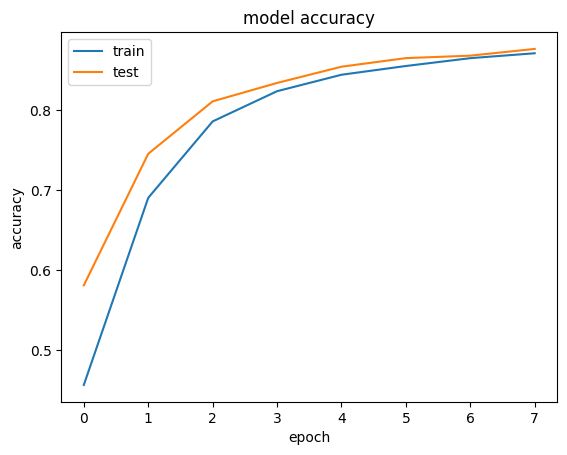

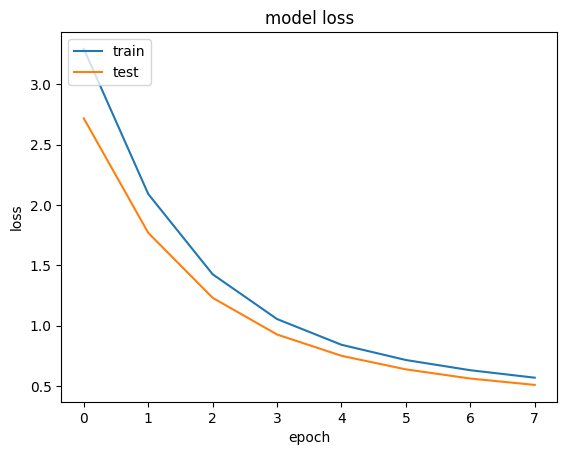

In [17]:
import matplotlib.pyplot as plt
print(histori.history.keys())
# summarize history for accuracy
plt.plot(histori.history['accuracy'])
plt.plot(histori.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('InceptionV3_fineTune_model_accuracy.png')
plt.show()
# summarize history for loss
plt.plot(histori.history['loss'])
plt.plot(histori.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('InceptionV3_fineTune_model_loss.png')
plt.show()

In [18]:
base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 200

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  311


In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.00001),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 11, 11, 2048)      21802784  
                                                                 
 global_average_pooling2d_5  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_7 (Dropout)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 143)               293007    
                                                                 
Total params: 22095791 (84.29 MB)
Trainable params: 17659983 (67.37 MB)
Non-trainable params: 4435808 (16.92 MB)
_________________________________________________________________


In [21]:
fine_tune_epochs = 15
total_epochs =  epochs + fine_tune_epochs

history_fine = model.fit(train_generator,
                         steps_per_epoch=len(train_generator),
                         epochs=total_epochs,
                         initial_epoch=histori.epoch[-1],
                         validation_steps=len(validation_generator),
                         validation_data=validation_generator)

Epoch 8/23
469/469 [==============================] - 693s 1s/step - loss: 0.4355 - accuracy: 0.8644 - val_loss: 0.3134 - val_accuracy: 0.8895
Epoch 9/23
469/469 [==============================] - 688s 1s/step - loss: 0.3485 - accuracy: 0.8924 - val_loss: 0.2919 - val_accuracy: 0.8991
Epoch 10/23
469/469 [==============================] - 683s 1s/step - loss: 0.3096 - accuracy: 0.9076 - val_loss: 0.2778 - val_accuracy: 0.9076
Epoch 11/23
469/469 [==============================] - 679s 1s/step - loss: 0.2745 - accuracy: 0.9187 - val_loss: 0.2731 - val_accuracy: 0.9102
Epoch 12/23
469/469 [==============================] - 673s 1s/step - loss: 0.2448 - accuracy: 0.9309 - val_loss: 0.2590 - val_accuracy: 0.9175
Epoch 13/23
469/469 [==============================] - 671s 1s/step - loss: 0.2173 - accuracy: 0.9382 - val_loss: 0.2573 - val_accuracy: 0.9187
Epoch 14/23
469/469 [==============================] - 677s 1s/step - loss: 0.1987 - accuracy: 0.9443 - val_loss: 0.2531 - val_accuracy: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


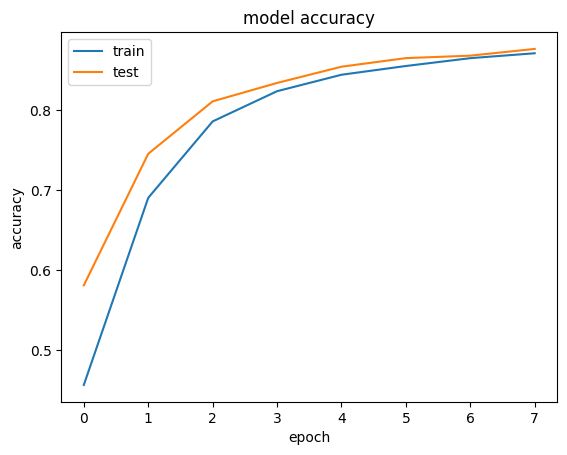

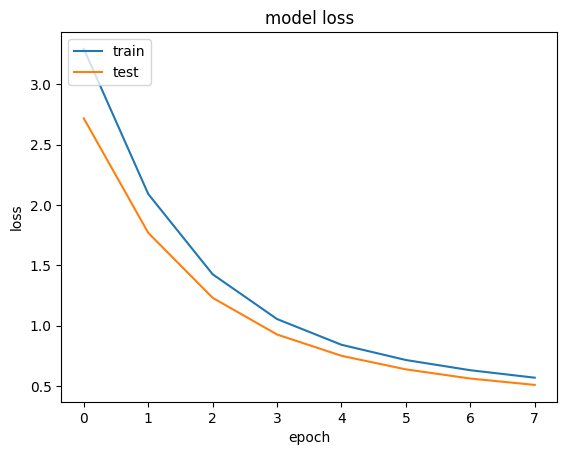

In [23]:
print(histori.history.keys())
# summarize history for accuracy
plt.plot(histori.history['accuracy'])
plt.plot(histori.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('InceptionV3_fineTune_model_accuracy.png')
plt.show()
# summarize history for loss
plt.plot(histori.history['loss'])
plt.plot(histori.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('InceptionV3_fineTune_model_loss.png')
plt.show()

In [6]:
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras_preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, Model, load_model
import numpy as np
import matplotlib.pyplot as plt



1/1 [==============================] - 1s 1s/step


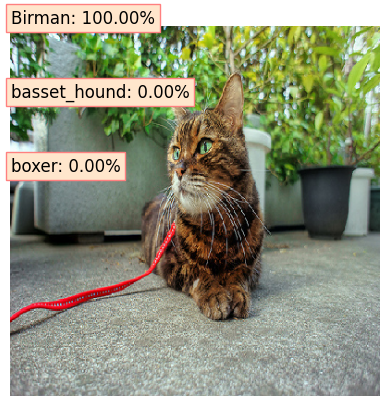

In [11]:
tes = load_model('anabul.h5')
img1 = load_img('dataset/valid/Bengal/Bengal_18.jpg', target_size=(400, 400))
x = img_to_array(img1)
x = np.expand_dims(x, axis=0)
preds = tes.predict(x)
top = preds[0].argsort()[-3:][::-1]
plt.imshow(img1)
plt.axis('off')
px=0

for i in top:
  plt.text(0.1, 0.2+px, classes[i]+': ' + "%.2f" % (preds[0][i]*100)+'%', size=12,
         ha="left", va="bottom",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.9, 0.8),
                   )
         )
  px+=80
